In [2]:
from __future__ import print_function
import matplotlib     # These are needed to run
matplotlib.use("Agg") # the code headless.

import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from numpy import interp
from sklearn.metrics import roc_curve, roc_auc_score
import scipy, scipy.signal
import datetime
%matplotlib inline

In [18]:
ssa = []
tft = []

ssa.append(np.loadtxt("./logs/2017-08-10_12:04:00_3d-2channel-finetuned-acc_0-of-2.log", delimiter=","))
ssa.append(np.loadtxt("./logs/2017-08-10_12:05:00_3d-2channel-finetuned-acc_1-of-2.log", delimiter=","))
ssa.append(np.loadtxt("./logs/2017-08-10_12:06:00_3d-2channel-finetuned-acc_2-of-2.log", delimiter=","))
ssa = np.transpose(np.array(ssa))

tft.append(np.loadtxt("./logs/2017-08-10_12:04:00_3d-2channel-finetuned-roc_0-of-2.log", delimiter=","))
tft.append(np.loadtxt("./logs/2017-08-10_12:05:00_3d-2channel-finetuned-roc_1-of-2.log", delimiter=","))
tft.append(np.loadtxt("./logs/2017-08-10_12:06:00_3d-2channel-finetuned-roc_2-of-2.log", delimiter=","))

Specificity: [ 0.          0.90909094  1.        ]
Avg: 0.636363645395
Sensitivity: [ 1.          0.125       0.21428573]
Avg: 0.446428577105
ROC AUC: [ 0.41758242  0.59090909  0.7       ]
Avg: 0.569497169497


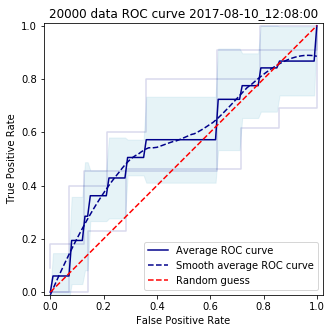

In [19]:
k = 3

dt = str(datetime.datetime.now().replace(second=0, microsecond=0).isoformat("_"))

plt.figure(figsize=(5, 5))

tprs = []

base_fpr = np.linspace(0, 1, 101)

for i in np.arange(k):
    fpr = tft[i][0]
    tpr = tft[i][1]
    plt.plot(fpr, tpr, alpha=0.15, color="darkblue")
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, color="darkblue", label="Average ROC curve")
plt.plot(base_fpr, scipy.signal.savgol_filter(mean_tprs,51,3),"--", color="darkblue", label="Smooth average ROC curve")
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='lightblue', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--', label="Random guess")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('20000 data ROC curve '+dt)
plt.legend(loc=4)
plt.axes().set_aspect('equal', 'datalim')
#plt.savefig("./figures/rocCurves/"+dt+"-CNNh5-finetunedRealData.png")

#log = open("./logs/"+dt+"-CNNh5.log","w+")
strOut = str("Specificity: "+str(ssa[0])+"\nAvg: "+str(np.mean(ssa[0]))+"\nSensitivity: "+str(ssa[1])+"\nAvg: "+str(np.mean(ssa[1]))+"\nROC AUC: "+str(ssa[2])+"\nAvg: "+str(np.mean(ssa[2])))
#log.write(strOut)
#log.close()
print(strOut)

In [3]:
ssa = []
tft = []

ssa.append(np.loadtxt("./logs/2017-08-14_14:15:00_3d-2channel-fakedata-acc_artefact.log", delimiter=","))
ssa.append(np.loadtxt("./logs/2017-08-14_16:41:00_3d-2channel-fakedata-acc_infarction.log", delimiter=","))
ssa.append(np.loadtxt("./logs/2017-08-14_18:50:00_3d-2channel-fakedata-acc_ischaemia.log", delimiter=","))
ssa.append(np.loadtxt("./logs/2017-08-15_09:43:00_3d-2channel-fakedata-acc_mixed.log", delimiter=","))
ssa = np.transpose(np.array(ssa))

tft.append(np.loadtxt("./logs/2017-08-14_14:15:00_3d-2channel-fakedata-roc_artefact.log", delimiter=","))
tft.append(np.loadtxt("./logs/2017-08-14_16:41:00_3d-2channel-fakedata-roc_infarction.log", delimiter=","))
tft.append(np.loadtxt("./logs/2017-08-14_18:50:00_3d-2channel-fakedata-roc_ischaemia.log", delimiter=","))
tft.append(np.loadtxt("./logs/2017-08-15_09:43:00_3d-2channel-fakedata-roc_mixed.log", delimiter=","))

Specificity: [ 0.764       0.88600001  0.764       0.81300001]
Avg: 0.806750004768
Sensitivity: [ 0.774       0.759       0.761       0.88600001]
Avg: 0.795000003338
ROC AUC: [ 0.850588  0.9224    0.85175   0.916282]
Avg: 0.885255


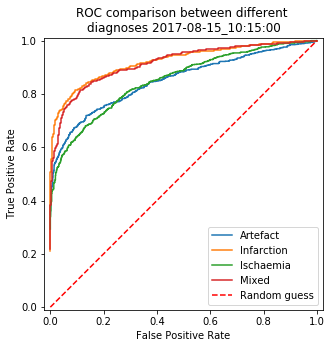

In [11]:
dt = str(datetime.datetime.now().replace(second=0, microsecond=0).isoformat("_"))

plt.figure(figsize=(5, 5))

base_fpr = np.linspace(0, 1, 101)

plt.plot(tft[0][0], tft[0][1], label="Artefact")
plt.plot(tft[1][0], tft[1][1], label="Infarction")
plt.plot(tft[2][0], tft[2][1], label="Ischaemia")
plt.plot(tft[3][0], tft[3][1], label="Mixed")

plt.plot([0, 1], [0, 1],'r--', label="Random guess")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC comparison between different \ndiagnoses '+dt)
plt.legend(loc=4)
plt.axes().set_aspect('equal', 'datalim')
plt.savefig("./figures/rocCurves/"+dt+"-CNN-pairwise.png")

log = open("./logs/"+dt+"-CNN-pairwise.log","w+")
strOut = str("Specificity: "+str(ssa[0])+"\nAvg: "+str(np.mean(ssa[0]))+"\nSensitivity: "+str(ssa[1])+"\nAvg: "+str(np.mean(ssa[1]))+"\nROC AUC: "+str(ssa[2])+"\nAvg: "+str(np.mean(ssa[2])))
log.write(strOut)
log.close()
print(strOut)